<a href="https://colab.research.google.com/github/HarimJung/HarimJung/blob/master/20190705.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1>Python을 활용한 기계학습 실습  </H1>

<H3>Instructor: Sungsu Lim </H3>

모듈 3 실습, 혁신성장 사업(인공지능 과정), July 5, 2019

<br>

<H3>목차</H3>

1. 선형 회귀분석 (Linear Regression)

2. 로지스틱 회귀분석 (Logistic Regression) : 바이너리 가능. 0 에서 1 사이.

3. 지지 벡터 머신 (Support Vector Machine)
: classifier
마진을 최대화 해서 넓게 짤라 보자., 고차원으로 보내보자: kernel svm

4. 의사 결정 나무 (Decision Tree)
:classifier : 매번 결정마다 스플리팅, 전체 후보셋을 가지치기로 줄여주기. 불순도를 평가하면서.

5. 랜덤 포레스트 (Random Forest)
배깅 부스팅 앙상블

6. 부스팅 (Boosting)

앙상블

7. 주성분 분석 (Principal Component Analysis)
차원축소

8. 협업 필터링 (Collaborative Filtering)
유저들의 추천 

9. k-means 군집화 (k-means Clustering)
평균값을 따라 클러스팅

10. 수행평가 (Evaluation)


<H2> 1. 선형 회귀분석 </H2>

In [0]:
# 가장 단순한 형태, 예측하는 모델

In [0]:
# 회귀 분석을 위한 가상 데이터 생성
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=20, n_features=1, # 포인트 2-개, 설명변수가 1개
                              bias=20, noise=20, coef=True, random_state=1# 노이즈와 바이어스 20 으로 두고 규칙은 1 로)

# bias 와 noise를 주는것, 0 으로 두면 일직선으로 나옴.

In [5]:
# 설명 변수 값 확인
X0[:5] # 0번쨰 부터 4 번까지, n_feature 갯수에 따라 차원 다름. 1 이면 2차원

array([[ 1.13376944],
       [-1.09989127],
       [ 0.58281521],
       [-0.7612069 ],
       [-0.24937038]])

In [0]:
# 목적 변수 값 확인
y # random_State=1 이다.규칙 넘버를 1 로 주는것, 할때 마다 같게 나오는것 

array([ 100.50617289,  -68.53229652,   66.4518984 ,  -34.89383078,
        -17.4429621 ,   99.99477074,   13.58444782, -109.41073927,
        -33.54404231,   -3.55714033, -136.06789744,   75.5272098 ,
        158.18789747,   10.72096745,   21.31280961,  155.22358861,
        -35.01984328,  -41.34492775,  -62.5505126 ,  -44.91792938])

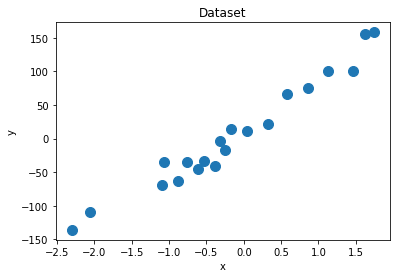

In [6]:
# 변수 간의 관계를 그려보기
import matplotlib.pyplot as plt

plt.scatter(X0, y, s=100) # plt.scatter 함수를 그리자.
plt.xlabel("x") ## x축 이름 라벨링 하는것 마음대로 가능.
plt.ylabel("y")
plt.title("Dataset")
plt.show()

In [0]:
# 회귀 분석을 위해 절편(intercept)을 함께 고려
import statsmodels.api as sm
from sklearn.datasets import make_regression

X = sm.add_constant(X0) # 원래있는 피쳐 행렬에 1 을 붙이는 식으로 절편 설정, 0,0 을 피하기 위해.
X[:5]

array([[ 1.        ,  1.13376944],
       [ 1.        , -1.09989127],
       [ 1.        ,  0.58281521],
       [ 1.        , -0.7612069 ],
       [ 1.        , -0.24937038]])

In [7]:
# 이제 리니어 리그레션으로 직선을 그어보자!
# scikit-learn을 활용한 선형 회귀분석
from sklearn.linear_model import LinearRegression

# 리니어를 model 로 리니어 리그레션 학습
model = LinearRegression().fit(X0, y) 
print(model.coef_, model.intercept_)# 그걸 찍어보자. intercept = 15.14.. sm.add_costant

[70.77284066] 15.149976217546051


In [0]:
# 만약 피쳐가 2 개 이상이면, 나오는 model 들의 식을 따르는 평면이 나온다.
# ax+by+cz+d=0. 변수가 3개 인경우, 목적변수 y 하나 설명변수 2 개 이면.( p+1), 3d regression image 삽입.

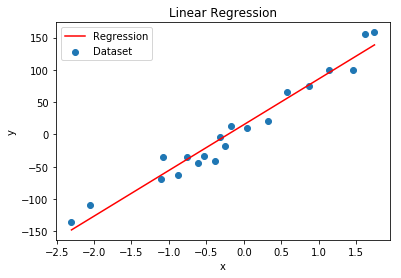

In [0]:
# 선형 회귀분석 결과 확인
import numpy as np

x_new = np.linspace(np.min(X0), np.max(X0), 100) # x 가 가지는 값을 100 개로 쪼갬
X_new = sm.add_constant(x_new)
y_new = model.intercept_+model.coef_*x_ne 
#리그레션 한 y 식을 만들어주기.model.

plt.scatter(X0, y, label="Dataset") # X0, y
plt.plot(x_new, np.ravel(y_new), 'r-', label="Regression") # r 은 레드, x_new, y_new
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend() # 빨간것과 선을 명시하하는것
plt.show()

<H2> 2. 로지스틱 회귀분석 </H2>

In [0]:
# 이진 분류를 위한 가상 데이터 생성,  기본적으로 0 과 1 바이너리 클래시피케이션. 
# 이산형 대신 확률형으로 회귀를 통한 분류.
from sklearn.datasets import make_classification

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1,
                            n_clusters_per_class=1, random_state=4)
X = sm.add_constant(X0)

In [0]:
# 0 또는 1의 label 값을 가짐
y

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0])

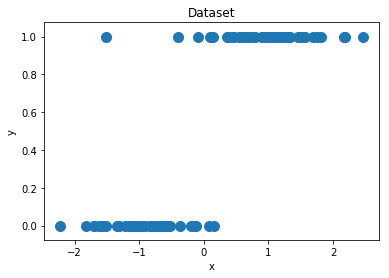

In [0]:
# 변수 간의 관계를 그려보기
import matplotlib.pyplot as plt

plt.scatter(X0, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Dataset")
plt.show()

In [0]:
# scikit-learn을 활용한 로지스틱 회귀분석
#Logit 이라는 함수를 사용해서
logit_mod = sm.Logit(y, X) # 모델은 logistic reg
logit_res = logit_mod.fit(disp=0) # result는 여기에 
np.exp(logit_res.params) # parameter 를 expression 해보라

array([ 1.28591352, 69.28566327])

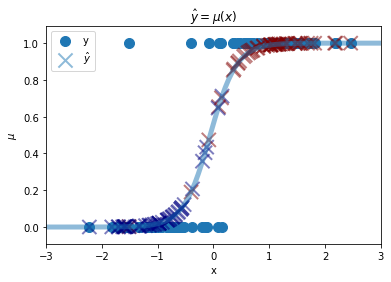

In [0]:
# 로지스틱 회귀분석 결과 확인
import matplotlib as mpl

xx = np.linspace(-3, 3, 100)
mu = logit_res.predict(sm.add_constant(xx)) # predict 함수를 쓰면, 각각의 result값들에 대한 예측값.

plt.plot(xx, mu, lw=5, alpha=0.5)
plt.scatter(X0, y, label="y", marker='o', s=100)
plt.scatter(X0, logit_res.predict(X), label=r"$\hat{y}$", marker='x', c=y,
            s=200, lw=2, alpha=0.5, cmap=mpl.cm.jet)
plt.xlim(-3, 3)
plt.xlabel("x")
plt.ylabel(r"$\mu$")
plt.title(r"$\hat{y} = \mu(x)$")
plt.legend()
plt.show()

<H2> 3. 지지 벡터 머신 </H2>

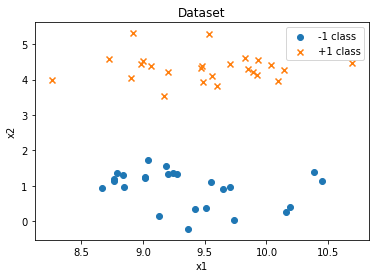

In [0]:
# 이진 분류를 위한 가상 데이터 생성 및 확인
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)
y = 2 * y - 1 # -1 과 1 로 나타내기위해

plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 class")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 class")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("Dataset")
plt.show()

In [0]:
# scikit-learn을 활용한 지지 벡터 머신
from sklearn.datasets import load_iris # iris 데이터셋
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data[:, [2, 3]] # iris 데이터의전체행의 2,3의 컬럼들을 보고싶다
y = iris.target 

# train 과 test를 자른다. train_test_split 함수, 0.3으로 나눔. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0 #seed number 이다)

                                                    
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))


def plot_iris(X, y, model, title, xmin=-2.5, xmax=2.5, ymin=-2.5, ymax=2.5):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                         np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r', marker='^', label='0', s=100)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='g', marker='o', label='1', s=100)
    plt.scatter(X[y == 2, 0], X[y == 2, 1], c='b', marker='s', label='2', s=100)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xlabel("Length")
    plt.ylabel("Width")
    plt.title(title)

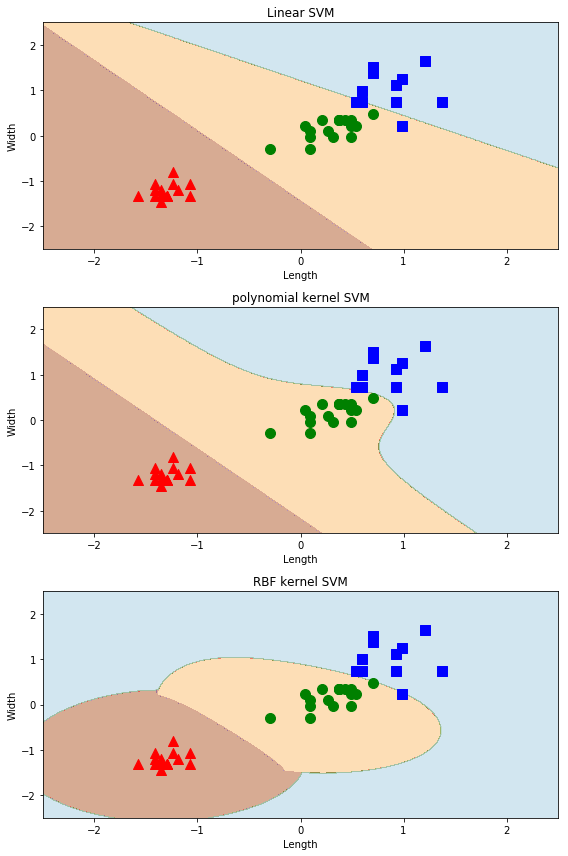

In [0]:
# 커널 함수에 따른 지지 벡터 머신 결과 확인
from sklearn.svm import SVC
# support vector classifier

# SVC.(model).fit
model1 = SVC(kernel='linear').fit(X_test_std, y_test)

model2 = SVC(kernel='poly', random_state=0,
             gamma=10, C=1.0).fit(X_test_std, y_test)

# C 는 마진.0 에 가까우면 하드마진. 크면 소프트 마진.
# gamma 

# 가우시안 분포를 따를때
model3 = SVC(kernel='rbf', random_state=0, gamma=1,
             C=1.0).fit(X_test_std, y_test)

plt.figure(figsize=(8, 12))

plt.subplot(311)
plot_iris(X_test_std, y_test, model1, "Linear SVM")

plt.subplot(312)
plot_iris(X_test_std, y_test, model2, "polynomial kernel SVM")

plt.subplot(313)
plot_iris(X_test_std, y_test, model3, "RBF kernel SVM")

plt.tight_layout()
plt.show()

<H2> 4. 의사 결정 나무 </H2>

In [0]:
# 붓꽃(Iris) 데이터 불러들이기
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, [2, 3]] # 컬럼들고오기
y = iris.target

In [0]:
# 변수 개수 및 값 확인
len(X), X[:5,]

(150, array([[1.4, 0.2],
        [1.4, 0.2],
        [1.3, 0.2],
        [1.5, 0.2],
        [1.4, 0.2]]))

In [0]:
# 0 또는 1 또는 2의 label 가짐: 각각 Setosa, Versicolour, Virginica
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [0]:
# scikit-learn을 활용한 의사 결정 나무
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0).fit(X, y)##바꿀수도있다.

# model(entropy를 기준으로 쓰는것 ,두단계 depth,) fit(X,y)

# 가장 중요한 분할기준, 여기서는 entropy를 줬기 때문에 width 가 나옴. 조정이 가능한 값들이 많다.
# decisiontreeclassifier 의 함수를 바꿔보자.

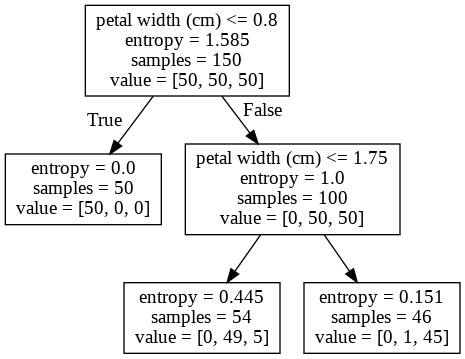

In [0]:
# 의사 결정 나무 그리는 코드 및 구성, 그리는 함수 그대로 가져오기.
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz


def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf,
                    feature_names=iris.feature_names[2:])
    #graphviz 라는 툴을 쓴다
    
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png() # png 를 저장하라
    return Image(image)


def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)

    return Z
  
draw_decision_tree(tree)

# entropy =0 하나 클래스 
#entropy =1 두개 클래스
# 또 엔트로피 기반으로 나눠보니까. 두개 가장 낮은 엔트로피는 0.445, 0.151 에 가중치 합 해야함. 

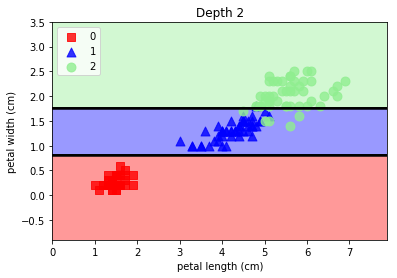

In [0]:
# 의사 결정 나무 그리는 코드를 통한 결정 경계(decision boundary) 표현
plot_decision_regions(X, y, tree, "Depth 2")
plt.show()

<H2> 5. 랜덤 포레스트 </H2>

In [0]:
# Iris 데이터에 대한 의사 결정 나무, 랜덤 포레스트 비교
# 앙상블 기법 배깅 부스팅. 배깅:랜덤포레스트

#위크 러너들을 조합해서 좀 더 똑똑한 애를 만들어보자는 취지.
# 랜덤은 트리 클래지파이어를 여러번 수행해서 결과를 합쳐주는 방식.

#뒤의 부스팅은 연속적으로 학습하는 과정, 틀린부분이 있으면 그 쪽에 더 많은 웨이트를 줘서 점점 수정하는 식.

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
X, y = iris.data[:, [0, 2]], iris.target # 0, 2번 칼럼으로 , comma 로 써줄수있다.

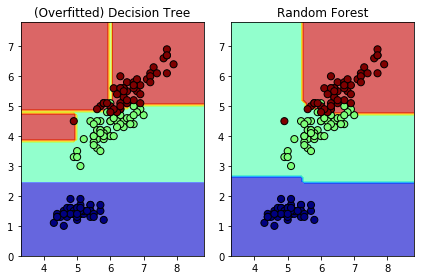

In [0]:
# Iris 데이터에 대한 의사 결정 나무, 랜덤 포레스트 비교
model1 = DecisionTreeClassifier(max_depth=10, random_state=0).fit(X, y)
model2 = RandomForestClassifier(max_depth=2, n_estimators=100, random_state=0).fit(X, y)
# 랜덤포레스트는 일반화가 가능, 디시즌 트리는 과적.
# 랜덤포레스트는 알아서 랜덤성을 가진다, 적은 정보로 조합을 하기에.//집단지성의 개념.

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
plt.subplot(121)

Z1 = model1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z1, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("(Overfitted) Decision Tree")
plt.subplot(122)

Z2 = model2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z2, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("Random Forest")
plt.tight_layout()
plt.show()

In [0]:
# 분류를 위한 가상 데이터 생성
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

X, y = make_classification(n_samples=1000, n_features=10, n_informative=3, n_redundant=0, n_repeated=0,
                           n_classes=2, random_state=0, shuffle=False)

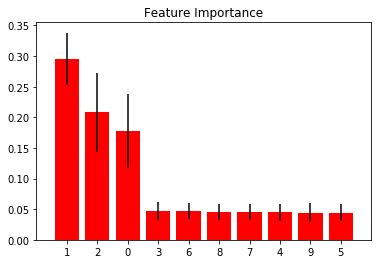

In [0]:
# 랜덤 포레스트를 통한 특징 중요도 랭킹//누가 중요한지
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X, y)

importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# 어떤 피쳐들이 많이 쓰였는가?
plt.title("Feature Importance") 
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


# 1개와 p-1 개의 피쳐들이 관계가 어떤지? 변수들간의 중요도 랭킹, 특징들 사이의 관계도 찾을수 있다. 

<H2> 6. 부스팅</H2>


In [0]:
# 복잡한 분류를 위한 가우시안 분포를 통한 데이터 생성
from sklearn.datasets import make_gaussian_quantiles
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
# 앙상블의 에이다 부스트


#쓰고 싶은 데이트를 만들어 주는것.

X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=100, n_features=2,
                                 n_classes=2, random_state=1)
# 100개의 x1 y1

#가우시안. cov 는 얼만큼 퍼져있나, 0,0 기준으로 2 정도의 분산.

X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)

# 200개의 x2, y2

# 3,3 기준으로 1.5만큼 퍼져있다. 2개의 피쳐 가지고 200개 샘플.

X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))## y2의 0,1 을 바꿔주는것.

#특정 가우시안에서 중앙에 몰려이쓴것 0 멀리있는걸 1번. 

In [0]:
# 에이다 부스트 수행을 위한 함수 작성
# 에이다 부스트가 매 수간마다 틀린걸 찾아서 연산해준다.

class MyAdaBoostClassifier(AdaBoostClassifier):
    
    def __init__(self,
                 base_estimator=None,
                 n_estimators=50,
                 learning_rate=1.,
                 algorithm='SAMME.R',
                 random_state=None):

        super(MyAdaBoostClassifier, self).__init__(
            base_estimator=base_estimator,
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            random_state=random_state)
        self.sample_weight = [None] * n_estimators
        
    def _boost(self, iboost, X, y, sample_weight, random_state):
        sample_weight, estimator_weight, estimator_error = \
        super(MyAdaBoostClassifier, self)._boost(iboost, X, y, sample_weight, random_state)
        self.sample_weight[iboost] = sample_weight.copy()
        return sample_weight, estimator_weight, estimator_error
    
model_ada = MyAdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=0), n_estimators=20)
model_ada.fit(X, y)

def plot_result(model, title="분류결과", legend=False, s=50):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))
    Y = model.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
    cs = plt.contourf(xx1, xx2, Y, cmap=plt.cm.Paired, alpha=0.5)
    for i, n, c in zip(range(2), "01", "br"):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=c, s=s, alpha=0.5, label="Class %s" % n)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    plt.colorbar(cs)
    if legend:
        plt.legend()
    plt.grid(False)

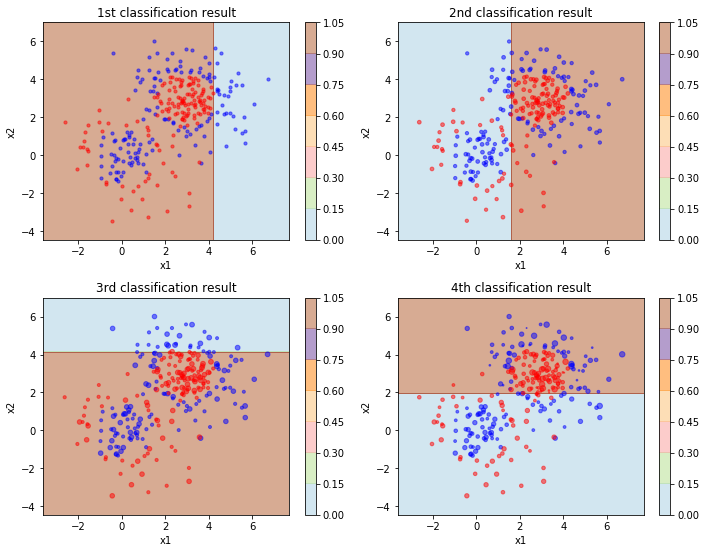

In [0]:
# 에이다부스트 학습 과정
plt.figure(figsize=(10, 15))
plt.subplot(421); 
plot_result(model_ada.estimators_[0], "1st classification result", s=10)
plt.subplot(422); 
plot_result(model_ada.estimators_[1], "2nd classification result", s=(4000*model_ada.sample_weight[0]).astype(int))
plt.subplot(423); 
plot_result(model_ada.estimators_[2], "3rd classification result", s=(4000*model_ada.sample_weight[1]).astype(int))
plt.subplot(424); 
plot_result(model_ada.estimators_[3], "4th classification result", s=(4000*model_ada.sample_weight[2]).astype(int))
plt.tight_layout()

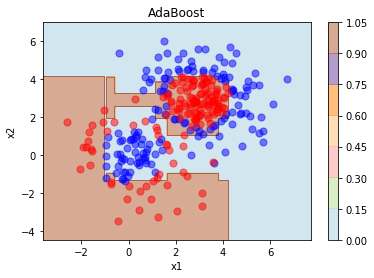

In [0]:
# 에이다 부스팅 모델: 다수결을 통한 정답 분류 및 오답에 가중치를 부여하여 학습하는 방식
plot_result(model_ada, "AdaBoost")

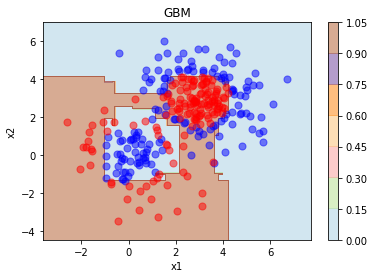

In [0]:
# 그래디언트 부스팅 모델: Loss function의 gradient를 통해 오답에 가중치 부여하여 학습하는 방식
from sklearn.ensemble import GradientBoostingClassifier

#앙상블을 쓸때, 정확도가 좋은걸로 우선적으로 할수있다. 랜덤포레스트와 그라디언트 부스팅을 쓸 수 있다.

model_grad = GradientBoostingClassifier(n_estimators=100, max_depth=2, random_state=0)# 한 백번 함, 
model_grad.fit(X, y)
plot_result(model_grad, "GBM")

<H2> 7. 주성분 분석 </H2>

In [0]:
# Iris 데이터의 특징 값
from sklearn.datasets import load_iris
iris = load_iris()
N = 10  # 앞의 10송이만 선택
X = iris.data[:N, :2]  # 꽃받침 길이와 꽃받침 폭만 선택

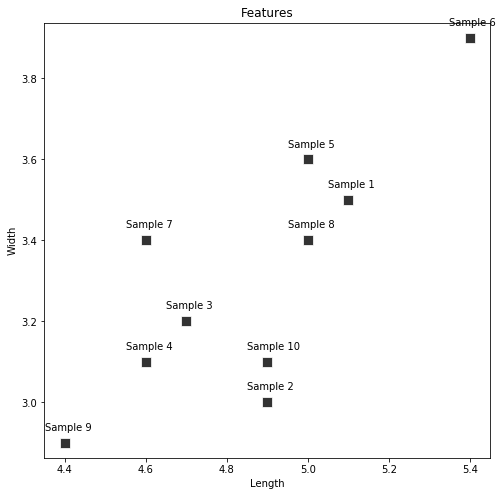

In [0]:
# 데이터를 좌표 평면 상에 표현해보기
import pandas as pd
import pystan
import seaborn as sns

plt.figure(figsize=(8, 8))
#데이터 프레임을 사용, 0, 1 은 x y 로 지정. 데이터프레임의 축에대한 0,1

ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")
for i in range(N):
    ax.text(X[i, 0] - 0.05, X[i, 1] + 0.03, "Sample {}".format(i + 1))
    # 위치를 잡아서 텍스트 까지 넣을수있음.
    
plt.xlabel("Length")
plt.ylabel("Width")
plt.title("Features")
plt.axis("equal")
plt.show()

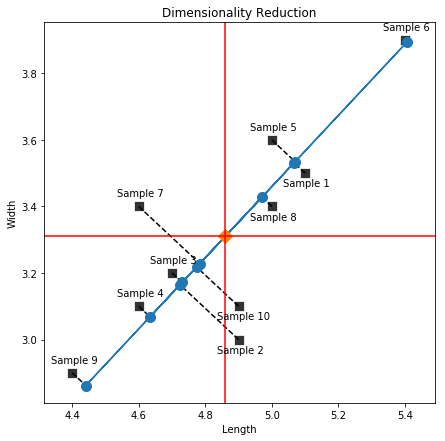

In [0]:
# scikit-learn을 활용한 주성분 분석
# pca 는 영점을 잡아서 그려주는 것

from sklearn.decomposition import PCA

pca1 = PCA(n_components=1)
X_low = pca1.fit_transform(X)
X2 = pca1.inverse_transform(X_low)

plt.figure(figsize=(7, 7))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")
for i in range(N):
    d = 0.03 if X[i, 1] > X2[i, 1] else -0.04
    ax.text(X[i, 0] - 0.065, X[i, 1] + d, "Sample {}".format(i + 1))
    plt.plot([X[i, 0], X2[i, 0]], [X[i, 1], X2[i, 1]], "k--")
plt.plot(X2[:, 0], X2[:, 1], "o-", markersize=10)
plt.plot(X[:, 0].mean(), X[:, 1].mean(), markersize=10, marker="D")
plt.axvline(X[:, 0].mean(), c='r')
plt.axhline(X[:, 1].mean(), c='r')
plt.grid(False)
plt.xlabel("Length")
plt.ylabel("Width")
plt.title("Dimensionality Reduction")
plt.axis("equal")
plt.show()

<H2>8. 협업 필터링</H2>

In [0]:
# 추천 시스템 구현을 위한 평점 데이터 불러오기
#!pip install surprise
#!pip install scikit-surprise
import surprise

data = surprise.Dataset.load_builtin('ml-100k')

In [0]:
# 평점 데이터 확인
df = pd.DataFrame(data.raw_ratings, columns=["user", "item", "rate", "id"])
del df["id"]
df.head(5)

,user,item,rate
0,196,242,3.0
1,186,302,3.0
2,22,377,1.0
3,244,51,2.0
4,166,346,1.0


In [0]:
# user-item 평점 행렬을 구성한 후 행렬 일부를 확인
df_table = df.set_index(["user", "item"]).unstack()
df_table.iloc[212:222, 808:817].fillna("")

rate                                
item  211 212 213 214 215 216 217 218 219
user                                     
290     3                   4       2    
291         4       4   4           4   4
292                 3                    
293     4       3       4   4   3   2    
294                                      
295             5       5   5   4   5    
296     4                                
297     4       3       2   4       3    
298     5       3       5                
299     4   4   5           5

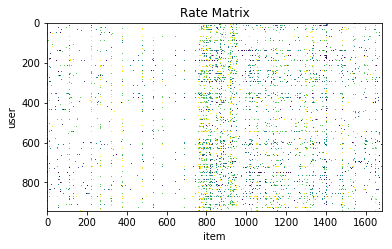

In [0]:
# 행렬의 형태 확인: 값이 있는 경우 검게, 없는 경우 하얗게 표현
plt.imshow(df_table)
plt.grid(False)
plt.xlabel("item")
plt.ylabel("user")
plt.title("Rate Matrix")
plt.show()

In [0]:
# Cosine 유사도를 통한 유사도 행렬 구성 후 추천하는 방식
from surprise.model_selection import cross_validate

sim_options = {'name': 'cosine'}
algo = surprise.KNNBasic(sim_options=sim_options)
cross_validate(algo, data)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


{'fit_time': (0.9313879013061523,
  0.9880704879760742,
  0.9281635284423828,
  0.9483840465545654,
  1.0012733936309814),
 'test_mae': array([0.80088739, 0.80530417, 0.81022506, 0.80080772, 0.80442868]),
 'test_rmse': array([1.01063654, 1.01942825, 1.02537433, 1.01300704, 1.01635604]),
 'test_time': (3.7017035484313965,
  3.5990567207336426,
  3.4427077770233154,
  3.682342052459717,
  3.441178798675537)}

In [0]:
# RMSE (Root Mean Squared Error)로 성능 평가
from surprise.model_selection import KFold

np.random.seed(0)
acc = np.zeros(3)
cv = KFold(3)
for i, (trainset, testset) in enumerate(cv.split(data)):
    algo.fit(trainset)
    predictions = algo.test(testset)
    acc[i] = surprise.accuracy.rmse(predictions, verbose=True)
acc.mean()

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0260
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0163
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0253


1.0225442145861894

<H2>9. k-means 클러스터링</H2>

In [0]:
# 군집화를 위한 가상 데이터 생성 및 확인
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, _ = make_blobs(n_samples=20, random_state=4)

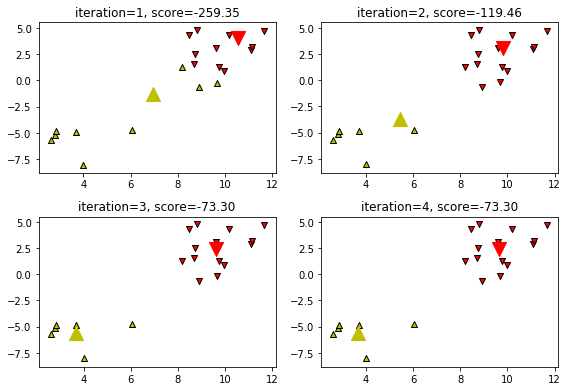

In [0]:
# k-means 클러스터링 단계별 결과 확인
def plot_KMeans(n):
    model = KMeans(n_clusters=2, init="random", n_init=1, max_iter=n, random_state=8).fit(X)
    c0, c1 = model.cluster_centers_
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], marker='v', facecolor='r', edgecolors='k')
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], marker='^', facecolor='y', edgecolors='k')
    plt.scatter(c0[0], c0[1], marker='v', c="r", s=200)
    plt.scatter(c1[0], c1[1], marker='^', c="y", s=200)
    plt.grid(False)
    plt.title("iteration={}, score={:5.2f}".format(n, model.score(X)))

plt.figure(figsize=(8, 8))
plt.subplot(321)
plot_KMeans(1)
plt.subplot(322)
plot_KMeans(2)
plt.subplot(323)
plot_KMeans(3)
plt.subplot(324)
plot_KMeans(4)
plt.tight_layout()
plt.show()

<H2>10. 수행평가</H2>


0. 유방암 진단 데이터

아래 dataset은 유방암(breast cancer) 진단 데이터를 제공한다. 유방암 진단 사진으로부터 측정한 종양(tumar)의 특징값을 사용하여 종양이 양성(benign)인지 악성(malignant)인지를 판별한다.



In [0]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [0]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
sy = pd.Series(cancer.target, dtype="category")
sy = sy.cat.rename_categories(cancer.target_names)
df['class'] = sy
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,benign


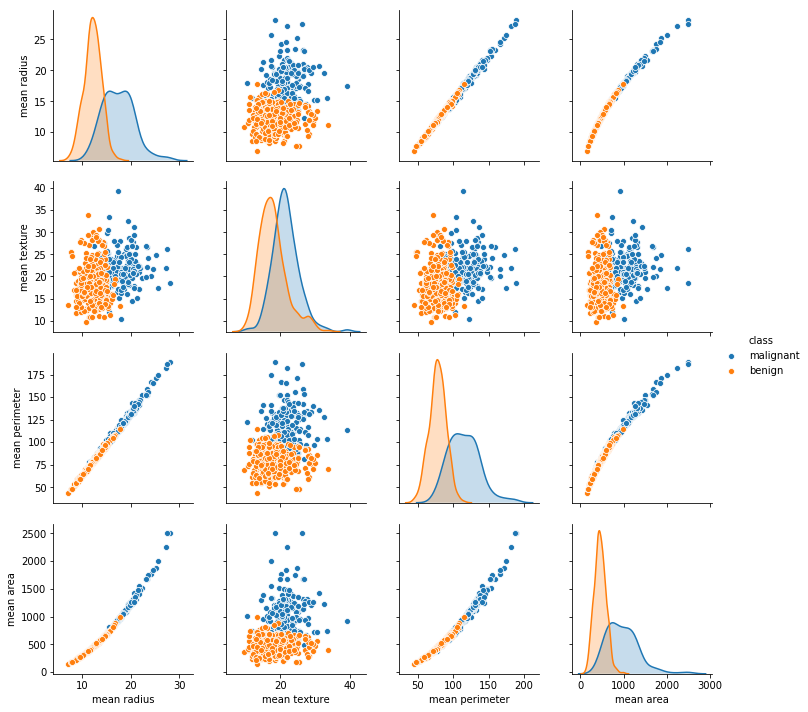

In [0]:
sns.pairplot(vars=["mean radius", "mean texture", "mean perimeter", "mean area"], 
             hue="class", data=df)
plt.show()

유방암 진단 데이터에 대해서 다음 문제들에 대해 답해보시오.

1. (회귀분석) 위 plot을 보면 mean radius와 mean area 두 특징 사이에는 양의 선형 상관 관계가 있는 것으로 추정된다.
mean area를 목적변수, mean radius를 설명변수로 하는 선형 회귀 분석을 수행하고 회귀식을 (a) 수식 및 (b) 그림으로 나타내어보시오(즉, 1번에선 양성/악성 정보를 쓰지 않는다). (c) mean radius 값이 20일 때, mean area의 추정값을 계산해보시오.

2. (분류) 위 plot을 보면 mean texture와 mean area 두 특징을 사용하면 클래스가 구분될 것으로 기대된다. (a) SVM 분류기(classifier)를 학습 후 결정 경계(decision boundary)를 표현해보시오. (b) RBF kernel + SVM의 수행 결과를 표현해보시오.

3. (차원 축소) 2번과 마찬가지로 mean texture, mean area 두 개의 feature만을 사용하여, 2차원에서 1차원으로 축소하는 PCA를 수행한 후 결과 좌표값을 나타내어보시오. 위 plot처럼 각 데이터 point마다 label 값을 색깔로 표현하여 보시오.

4. (비지도 학습) 2번과 마찬가지로 mean texture, mean area 두 개의 feature만을 사용하여 k-means 클러스터링을
수행하여 보시오. (a) k=2, (b) k=3일 때, 각각에 대한 결과를 그림으로 나타내어보시오.

5. (앙상블 기법) 배깅과 부스팅 각각에 대해 (a) 요약하여 설명하여 보시오. (b) 수업에서 배운 내용 이외의 앙상블 기법 아이디어를 한 가지 이상 자유롭게 제안하여 보시오.

<H3>수행 평가</H3>
1~3번 Python 실습 결과 제출

- 제목: [1차 수행평가] XXX 결과물 제출
- 내용: ppt에 사용한 코드 및 결과 정리(교육생의 수행평가 결과물을 ppt로 받아서 평가)
- 구성: 양식은 자유이지만, 첫 페이지에 1차 수행평가, 이름이 들어가도록 하여야 함
- 분량: 1번부터 5번까지 각 문항 당 2페이지 이내로 작성 -> 총 5~10페이지
- sungsu@cnu.ac.kr